## Table of Contents
* [Import data/modules](#import-data)
* [Exploratory Data Analysis](#eda)
* [Features Engineering/Preprocessing](#preprocessing)
* [Modeling](#modeling)
  * [MVP Eligibility Model](#eligibility)
  * [Eligibility Prediction](#eligibility_Predict)
  * [MVP Share Model](#MVP)
  * [MVP Prediction](#MVP_Predict)



---




## Import data/modules <a class="anchor" id="import-data"></a>

In [16]:

import pandas as pd
import numpy as np 
from sklearn.compose import ColumnTransformer
import sklearn.preprocessing as pp
from sklearn.model_selection import train_test_split
import datetime
import matplotlib as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import svm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import GridSearchCV, learning_curve
from sklearn.svm import SVR
import pickle
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_regression
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import mutual_info_regression

import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

In [17]:
pd.set_option('display.max_columns', None)

In [18]:
#from google.colab import drive
#drive.mount('/content/drive')

In [19]:

dataPath = "/content/drive/MyDrive/Data Mining/Data"


In [20]:
#master = pd.read_csv(dataPath + "/global.csv")
master = pd.read_csv("global.csv")
master.head()

Player Pos  Age   Tm                Team   G  GS   MPG    FG  \
0  Kareem Abdul-Jabbar   C   32  LAL  Los Angeles Lakers  82 NaN  38.3  10.2   
1         Marty Byrnes  SF   23  LAL  Los Angeles Lakers  32 NaN   6.1   0.8   
2           Jim Chones   C   30  LAL  Los Angeles Lakers  82 NaN  29.2   4.5   
3       Michael Cooper  SG   23  LAL  Los Angeles Lakers  82 NaN  24.1   3.7   
4      Spencer Haywood  PF   30  LAL  Los Angeles Lakers  76 NaN  20.3   3.8   

    FGA    FG%   3P  3PA   3P%    2P   2PA    2P%   eFG%   FT  FTA    FT%  \
0  16.9  0.604  0.0  0.0  0.00  10.2  16.9  0.604  0.604  4.4  5.8  0.765   
1   1.6  0.500  0.0  0.0   NaN   0.8   1.6  0.500  0.500  0.4  0.5  0.867   
2   9.3  0.489  0.0  0.0  0.00   4.5   9.2  0.491  0.489  1.5  2.1  0.740   
3   7.0  0.524  0.1  0.2  0.25   3.6   6.8  0.534  0.529  1.4  1.7  0.776   
4   7.8  0.487  0.0  0.1  0.25   3.8   7.7  0.489  0.488  2.1  2.7  0.772   

   ORB  DRB   TRB  AST  STL  BLK  TOV   PF   PTS     Season  Decade  Trade  \
0  2.3  8.5  10.8  4.5  1.0  3.4  3.6  2.6  24.8  1979-1980    1980  False   
1  0.3  0.6   0.8  0.4  0.2  0.0  0.7  1.0   2.0  1979-1980    1980  False   
2  1.7  5.1   6.9  1.8  0.7  0.8  2.1  3.3  10.6  1979-1980    1980  False   
3  1.2  1.6   2.8  2.7  1.0  0.5  1.7  2.6   8.8  1979-1980    1980  False   
4  1.7  2.8   4.6  1.2  0.5  0.8  1.8  2.6   9.7  1979-1980    1980  False   

    MPTot   PER    TS%   3PAr    FTr  ORB%  DRB%  TRB%  AST%  STL%  BLK%  \
0  3143.0  25.3  0.639  0.001  0.344   7.2  22.2  15.4  16.5   1.2   4.6   
1   194.0   6.3  0.557  0.000  0.300   5.5   9.3   7.6   7.9   1.2   0.3   
2  2394.0  11.3  0.521  0.003  0.222   7.1  17.6  12.8   7.6   1.1   1.4   
3  1973.0  12.5  0.563  0.035  0.247   6.1   6.5   6.3  13.5   2.0   1.0   
4  1544.0  13.9  0.540  0.007  0.349  10.2  13.9  12.2   7.6   1.0   1.9   

   TOV%  USG%  OWS  DWS    WS  WS/48  OBPM  DBPM  BPM  VORP    MVP  PastMVP  \
0  15.7  24.1  9.5  5.3  14.8  0.227   4.8   2.4  7.2   7.3   True     True   
1  28.0  16.2 -0.1  0.2   0.0  0.009  -4.4  -0.9 -5.2  -0.2  False    False   
2  17.3  16.9  0.7  2.8   3.5  0.071  -2.0  -0.3 -2.4  -0.2  False    False   
3  18.1  15.9  2.2  1.8   4.0  0.097  -0.4   0.3 -0.1   0.9  False    False   
4  16.4  21.2  1.4  1.7   3.1  0.095  -1.3  -0.9 -2.3  -0.1  False    False   

    W   L   W/L%   GB   PS/G   PA/G  SRS  GBC  Playoffs  Ranking_Conf  \
0  60  22  0.732  1.0  115.1  109.2  5.4  0.0      True           1.0   
1  60  22  0.732  1.0  115.1  109.2  5.4  0.0      True           1.0   
2  60  22  0.732  1.0  115.1  109.2  5.4  0.0      True           1.0   
3  60  22  0.732  1.0  115.1  109.2  5.4  0.0      True           1.0   
4  60  22  0.732  1.0  115.1  109.2  5.4  0.0      True           1.0   

   Ranking_League  MVP_share  Game_played_prop  ShareYN  
0             2.0      0.665          1.000000     True  
1             2.0      0.000          0.390244    False  
2             2.0      0.000          1.000000    False  
3             2.0      0.000          1.000000    False  
4             2.0      0.000          0.926829    False

In [21]:
master.shape

(15763, 70)

In [22]:
## Imbalanced Data Ratio 
master[master["ShareYN"] ==True].shape[0] / master.shape[0]

0.04307555668337246

In [23]:
#from google.colab import drive
#drive.mount('/content/drive')

In [24]:
#s22 = pd.read_csv(dataPath + "/NBA_stat_2022.csv")
s22 = pd.read_csv( "NBA_stat_2022.csv")
s22.head()

Player Pos  Age   Tm                 Team   G  GS   MPG   FG  \
0  Precious Achiuwa   C   22  TOR  Toronto Raptors (7)  59  25  23.1  3.4   
1        OG Anunoby  SF   24  TOR  Toronto Raptors (7)  42  42  36.7  6.6   
2     Dalano Banton  SF   22  TOR  Toronto Raptors (7)  58   1  11.5  1.4   
3    Scottie Barnes  PF   20  TOR  Toronto Raptors (7)  60  60  35.6  6.2   
4        Khem Birch   C   29  TOR  Toronto Raptors (7)  42  17  18.3  1.8   

    FGA    FG%   3P  3PA    3P%   2P   2PA    2P%   eFG%   FT  FTA    FT%  \
0   7.9  0.429  0.6  1.6  0.362  2.8   6.3  0.447  0.466  1.1  1.8  0.590   
1  15.1  0.436  2.4  6.8  0.351  4.2   8.3  0.506  0.515  1.9  2.5  0.748   
2   3.4  0.403  0.2  0.9  0.260  1.1   2.5  0.452  0.436  0.4  0.7  0.615   
3  12.5  0.491  0.8  2.6  0.314  5.4  10.0  0.536  0.523  2.2  3.0  0.732   
4   3.7  0.474  0.0  0.2  0.000  1.8   3.5  0.500  0.474  1.0  1.4  0.746   

   ORB  DRB  TRB  AST  STL  BLK  TOV   PF   PTS     Season  Decade  Trade  \
0  2.1  4.7  6.8  1.1  0.5  0.6  1.1  2.1   8.4  2021-2022    2020  False   
1  1.6  3.9  5.5  2.6  1.5  0.6  1.8  3.0  17.5  2021-2022    2020  False   
2  0.6  1.4  2.0  1.6  0.5  0.2  0.9  1.1   3.4  2021-2022    2020  False   
3  2.6  5.0  7.6  3.4  1.2  0.8  1.9  2.6  15.3  2021-2022    2020  False   
4  2.2  2.2  4.5  1.0  0.6  0.5  0.5  1.9   4.6  2021-2022    2020  False   

   PastMVP   MPTot   PER    TS%   3PAr    FTr  ORB%  DRB%  TRB%  AST%  STL%  \
0    False  1365.0  12.5  0.484  0.201  0.224   9.3  23.4  16.0   6.9   1.2   
1    False  1541.0  14.5  0.538  0.449  0.169   4.4  12.3   8.1  10.9   2.1   
2    False   666.0   9.7  0.457  0.255  0.199   5.4  13.8   9.3  19.5   2.0   
3    False  2133.0  16.4  0.552  0.203  0.238   7.6  16.1  11.6  14.3   1.6   
4    False   769.0  13.4  0.528  0.051  0.378  12.5  13.8  13.1   7.8   1.7   

   BLK%  TOV%  USG%  OWS  DWS   WS  WS/48  OBPM  DBPM  BPM  VORP     W     L  \
0   2.4  11.2  18.1  0.2  1.6  1.8  0.064  -2.4  -0.7 -3.1  -0.4  38.0  30.0   
1   1.5   9.8  20.9  1.4  1.6  3.0  0.093   0.1   0.0  0.1   0.8  38.0  30.0   
2   1.5  19.6  17.0 -0.4  0.7  0.3  0.020  -3.5   0.2 -3.4  -0.2  38.0  30.0   
3   2.3  12.1  18.9  3.0  2.3  5.3  0.119   0.5   0.3  0.8   1.5  38.0  30.0   
4   2.7  11.2  11.4  1.2  0.8  2.0  0.123  -1.5   0.4 -1.1   0.2  38.0  30.0   

    W/L%    GB   PS/G   PA/G   SRS  GBC  Ranking_Conf  Playoffs  \
0  0.559  16.0  108.9  107.3  1.65  7.0             7      True   
1  0.559  16.0  108.9  107.3  1.65  7.0             7      True   
2  0.559  16.0  108.9  107.3  1.65  7.0             7      True   
3  0.559  16.0  108.9  107.3  1.65  7.0             7      True   
4  0.559  16.0  108.9  107.3  1.65  7.0             7      True   

   Ranking_League  Game_played_prop  
0              14          0.867647  
1              14          0.617647  
2              14          0.852941  
3              14          0.882353  
4              14          0.617647

In [25]:
master[master["ShareYN"] ==True].shape[0]/41

16.5609756097561

## Exploratory Data Analysis <a class="anchor" id="eda"></a>

Prediction column 
- MVP (boolean)
- MVP_share (share)
- ShareYN (represent the fact that one player received votes for MVP or not)

In [26]:
hist_mvp = master.copy()
hist_mvp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15763 entries, 0 to 15762
Data columns (total 70 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Player            15763 non-null  object 
 1   Pos               15763 non-null  object 
 2   Age               15763 non-null  int64  
 3   Tm                15763 non-null  object 
 4   Team              15763 non-null  object 
 5   G                 15763 non-null  int64  
 6   GS                15276 non-null  float64
 7   MPG               15763 non-null  float64
 8   FG                15763 non-null  float64
 9   FGA               15763 non-null  float64
 10  FG%               15709 non-null  float64
 11  3P                15763 non-null  float64
 12  3PA               15763 non-null  float64
 13  3P%               13351 non-null  float64
 14  2P                15763 non-null  float64
 15  2PA               15763 non-null  float64
 16  2P%               15674 non-null  float6

Visualize significant features vs. Share YN </br>

In [27]:
def show_feature_vs_YN(feature, df):
    fig = px.scatter(data_frame = df,
               x= feature,
               y='ShareYN',
               color='ShareYN',
               color_discrete_sequence=['blue','gray'], 
               #hover_data={
                   #'Win/Lose': False,
                   #'Player': True, 
                   #'year': True,
                   #'seed': True,
                   #'W/L%': True, 
                   #'W': True}
                )
    fig.update_layout(height=500,
                     title = f"{feature} vs. ShareYN" )
    fig.show()

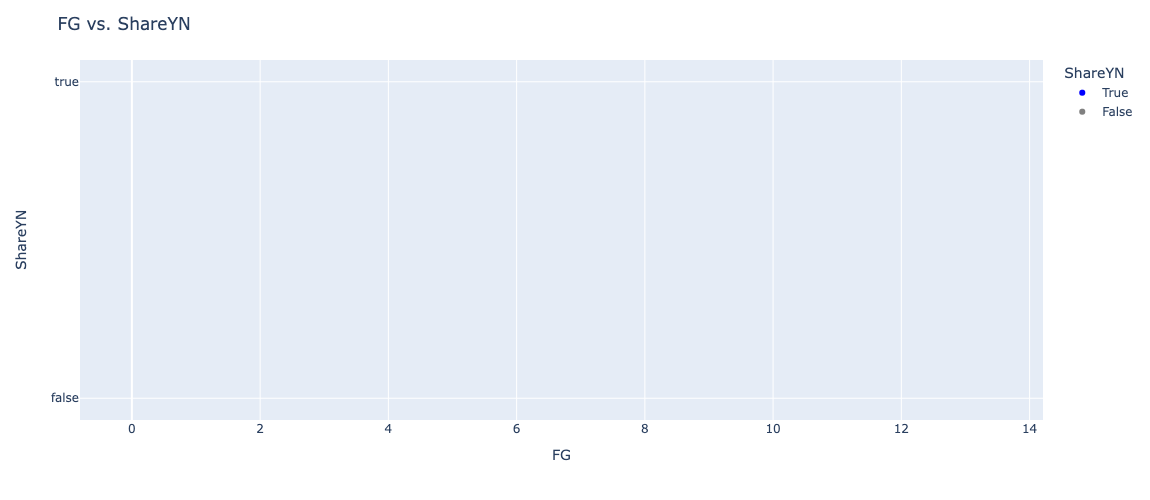

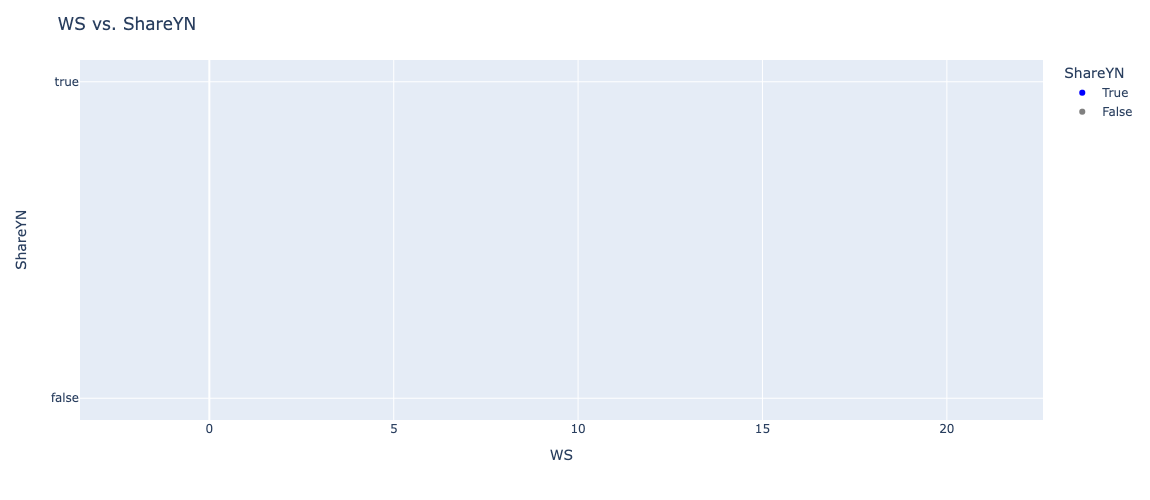

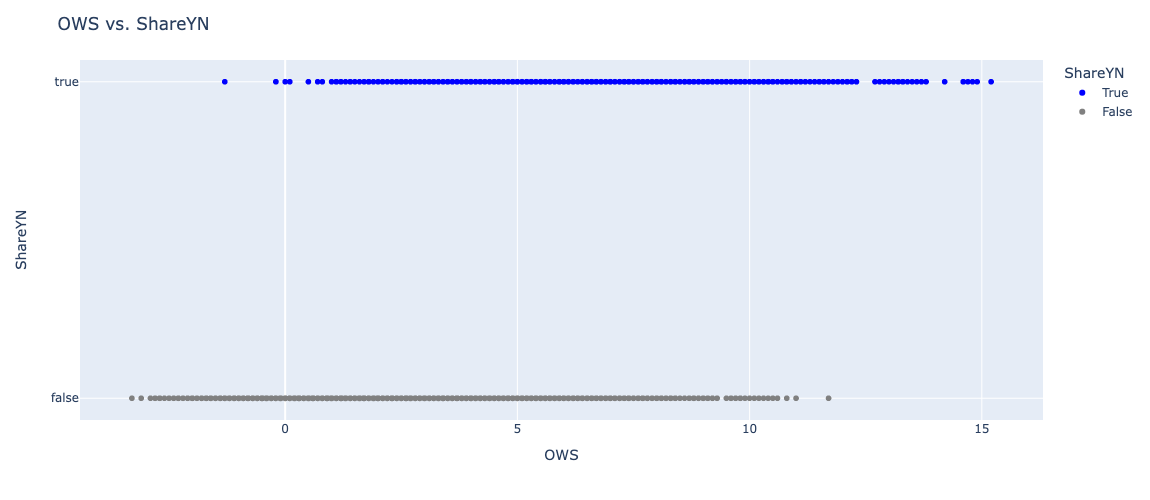

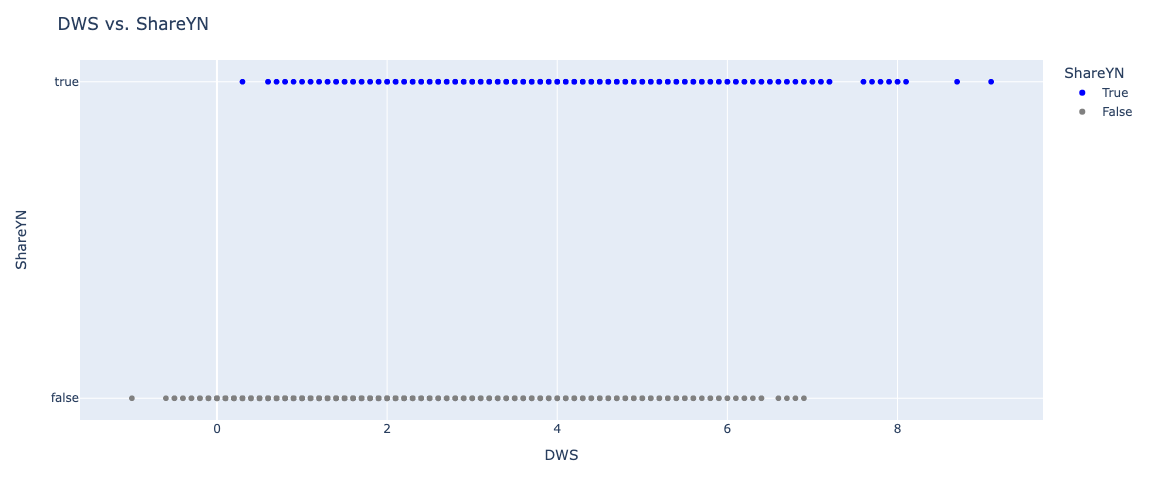

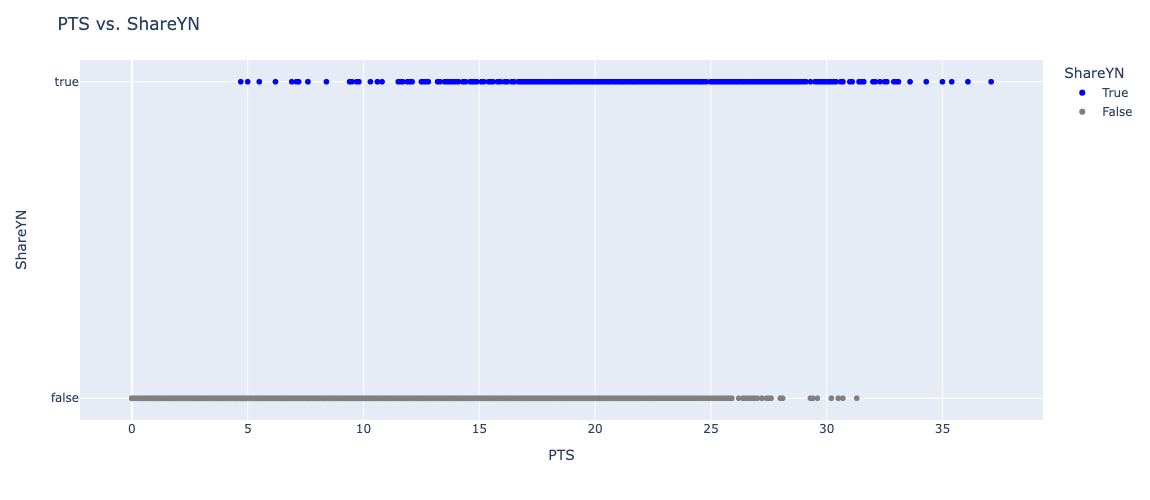

In [28]:
features = ["FG","WS","OWS","DWS","PTS"]

for feature in features:
    show_feature_vs_YN(feature=feature, df=hist_mvp)

In [29]:
temp = hist_mvp[hist_mvp["ShareYN"]]

In [30]:
def show_feature_vs_share(feature, df):
    fig = px.scatter(data_frame = df,
               x= feature,
               y='MVP_share',
               color_discrete_sequence=['blue','gray'], 
               #hover_data={
                   #'Win/Lose': False,
                   #'Player': True, 
                   #'year': True,
                   #'seed': True,
                   #'W/L%': True, 
                   #'W': True}
                )
    fig.update_layout(height=500,
                     title = f"{feature} vs. MVP Share" )
    fig.show()

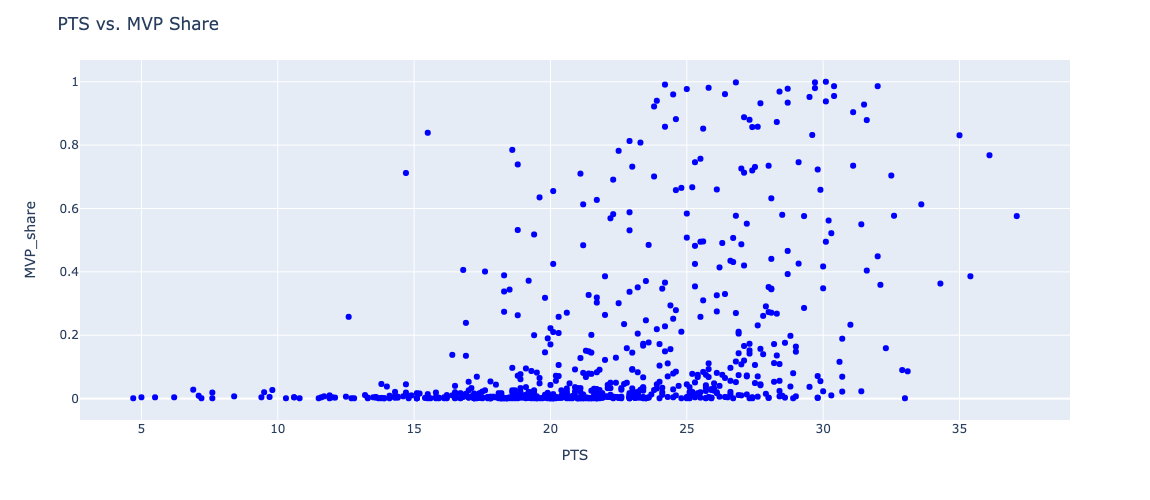

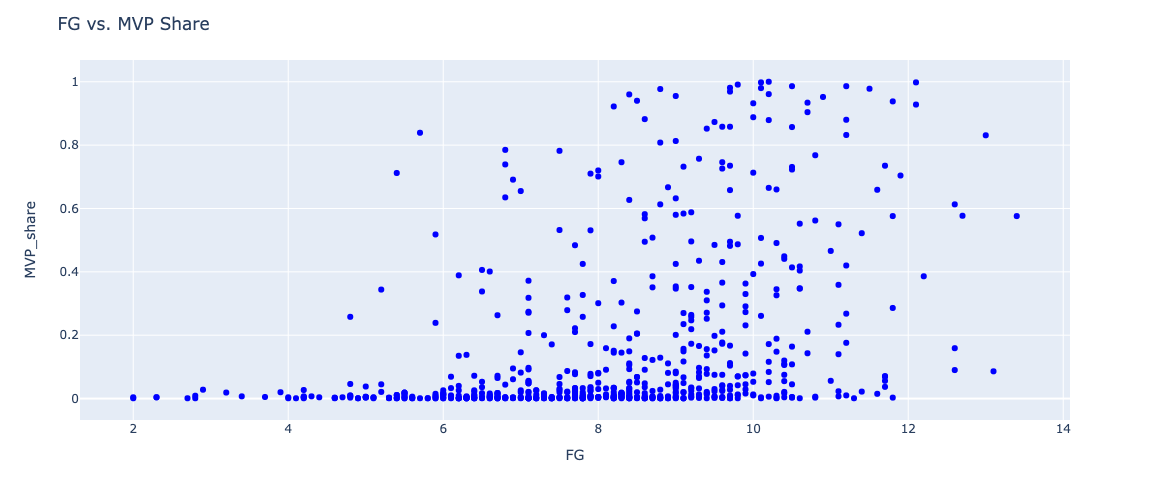

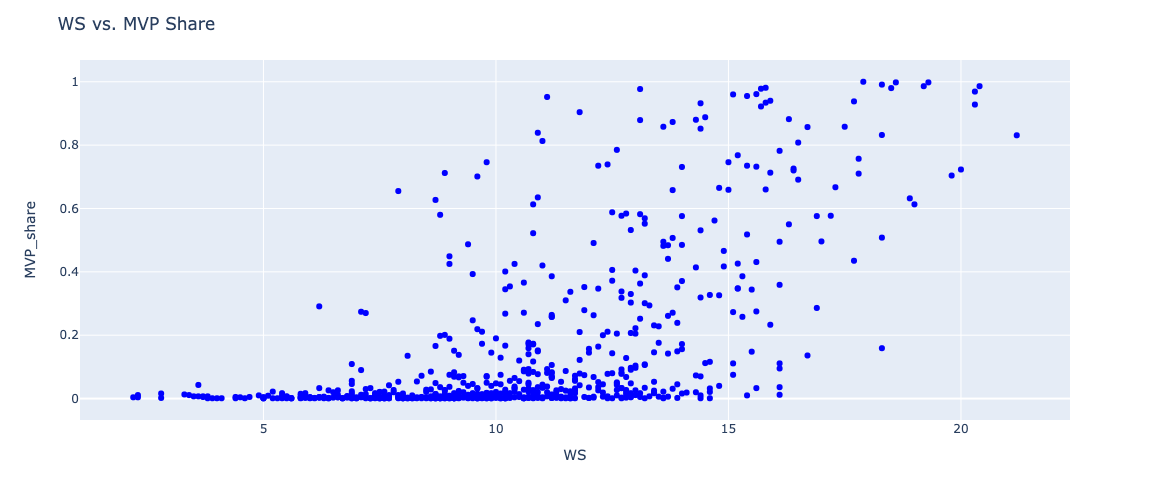

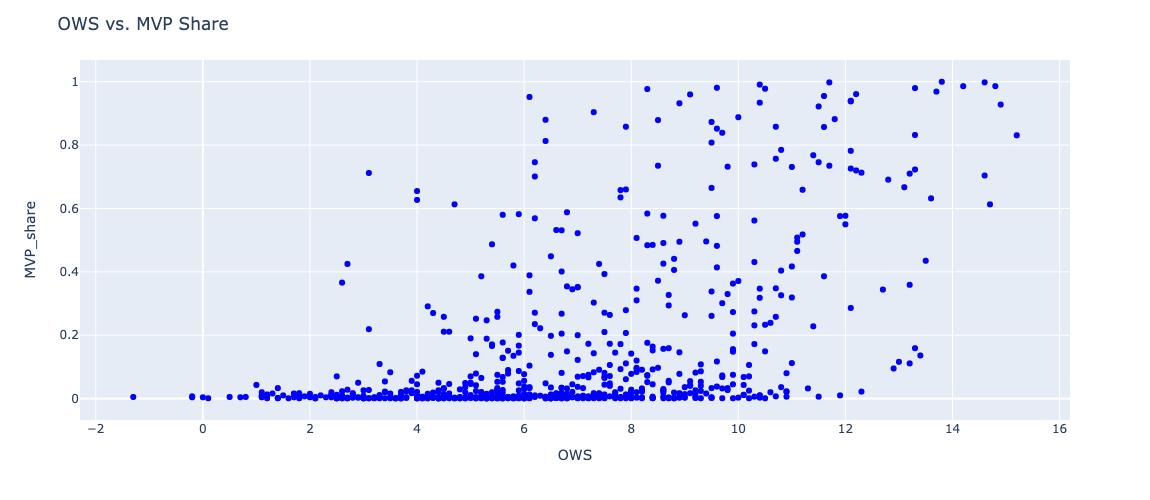

In [31]:
features = ["PTS","FG","WS","OWS"]

for feature in features:
    show_feature_vs_share(feature=feature, df=temp)

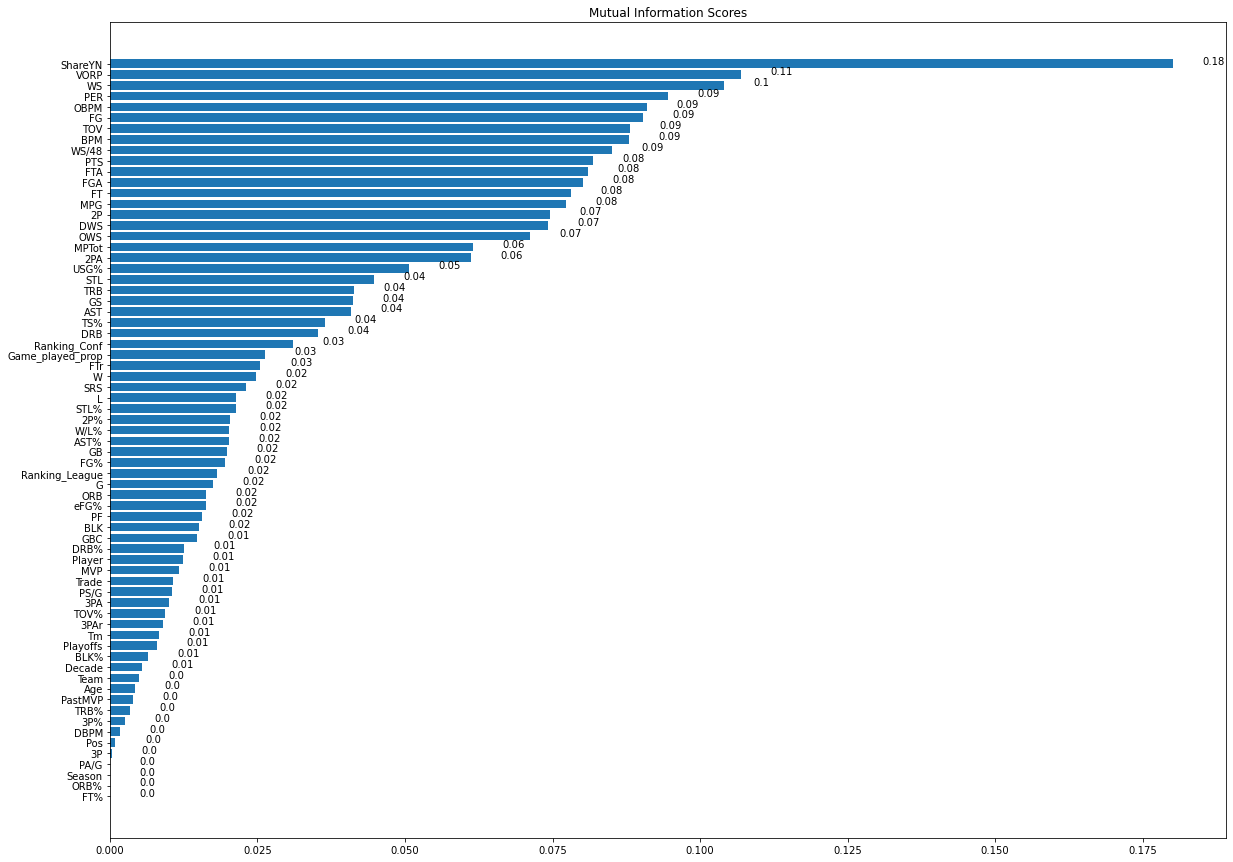

In [30]:
hist_mvp = hist_mvp.fillna(0)
def calculate_ml_scores(df):
    X = df.copy()
    y = X["MVP_share"]

    X.drop('MVP_share', axis=1, inplace=True)

    # Label encoding for categoricals
    for colname in X.select_dtypes("object"):
        X[colname], _ = X[colname].factorize()

    # All discrete features should now have integer dtypes (double-check this before using MI!)
    discrete_features = X.dtypes == int
    
    mi_scores = mutual_info_regression(X, y)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return X, y, mi_scores
X, y, mi_scores = calculate_ml_scores(df=hist_mvp)
def plot_mi_scores(scores, figsize):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    
    fig, ax = plt.subplots(figsize=figsize)
    ax.barh(width, scores)
    
    for index, value in enumerate(scores):
        plt.text(value +0.005 , index, str(round(value,2)))
    
    plt.yticks(width, ticks)    
    plt.title("Mutual Information Scores")
plot_mi_scores(mi_scores, figsize=(20,15))


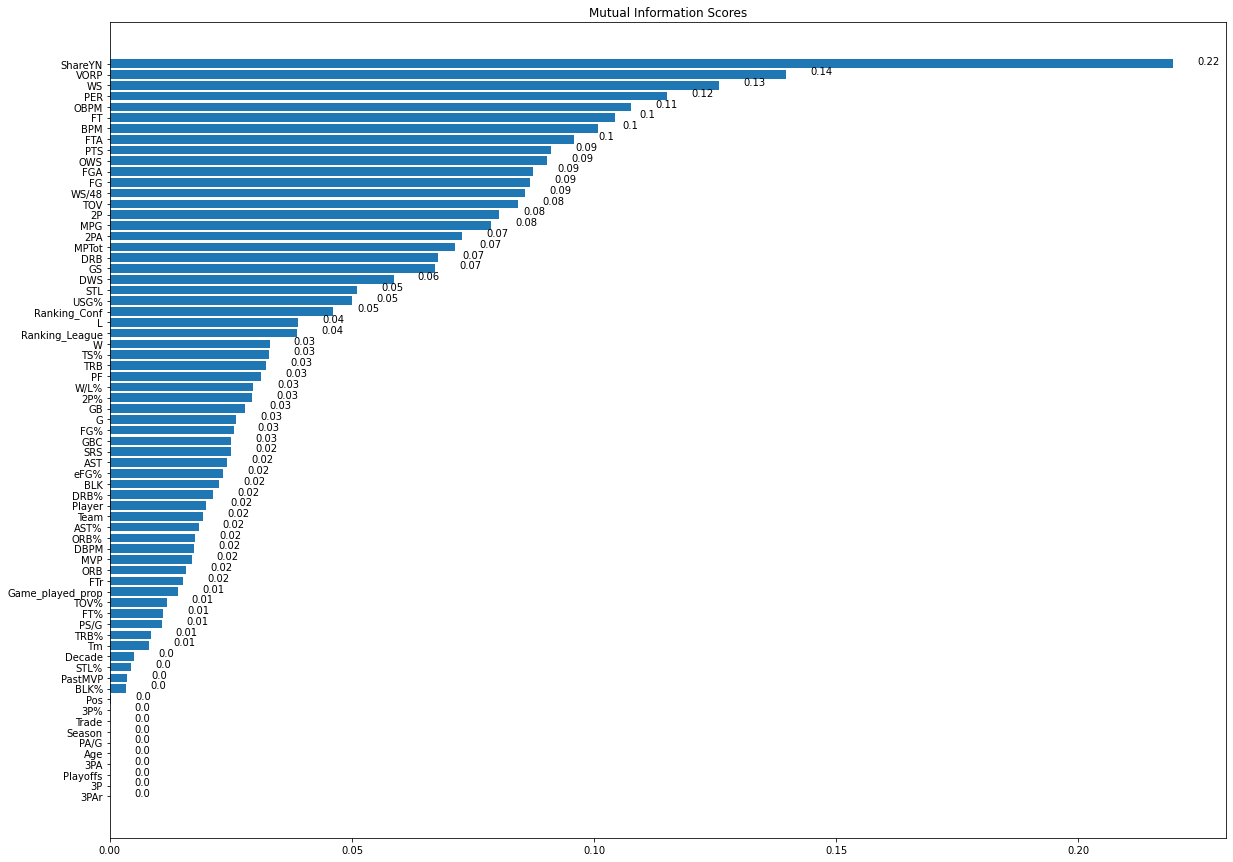

In [ ]:
hist_mvp = hist_mvp.fillna(0)
hist_mvp_before2000 = hist_mvp.loc[(hist_mvp['Decade'] == 1980)|(hist_mvp['Decade']==1990)]
hist_mvp_before2000
X, y, mi_scores = calculate_ml_scores(df=hist_mvp_before2000)

plot_mi_scores(mi_scores, figsize=(20,15))


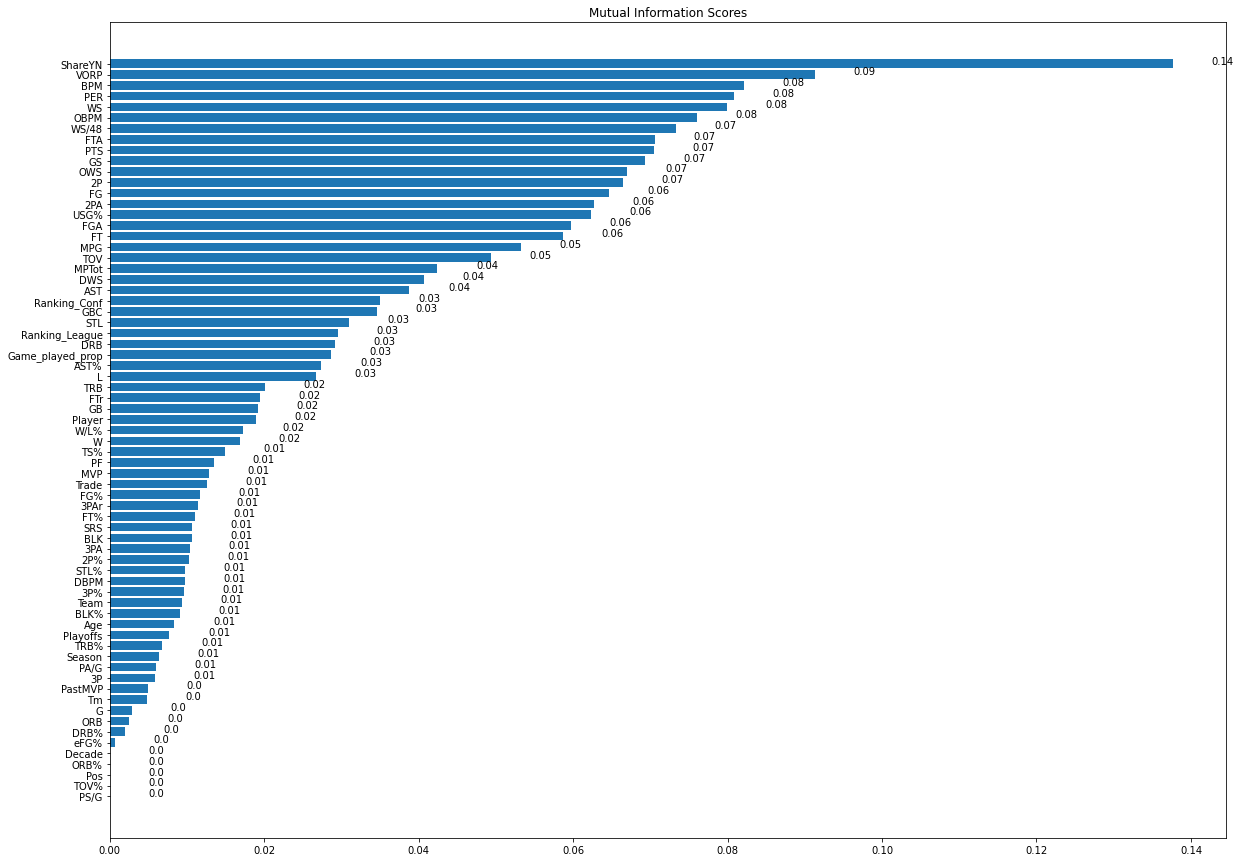

In [ ]:
hist_mvp = hist_mvp.fillna(0)
hist_mvp_after2000 = hist_mvp.loc[(hist_mvp['Decade'] == 2000)|(hist_mvp['Decade']==2010)|(hist_mvp['Decade']==2020)]

X, y, mi_scores = calculate_ml_scores(df=hist_mvp_after2000)

plot_mi_scores(mi_scores, figsize=(20,15))


In [ ]:
mvps = hist_mvp[hist_mvp["MVP"]]
mvpsInfo = mvps.describe()
mvpsInfo

Age          G         GS        MPG         FG        FGA  \
count  42.000000  42.000000  42.000000  42.000000  42.000000  42.000000   
mean   27.833333  77.642857  75.547619  37.421429   9.773810  19.223810   
std     2.853467   6.551192  13.588378   2.474705   1.510461   2.973198   
min    22.000000  49.000000   0.000000  30.400000   5.700000  11.400000   
25%    26.000000  76.250000  76.000000  36.225000   8.850000  17.225000   
50%    27.500000  80.000000  79.500000  37.650000   9.900000  19.550000   
75%    29.000000  81.750000  81.000000  38.875000  10.650000  21.025000   
max    35.000000  82.000000  82.000000  42.000000  13.000000  25.500000   

             FG%         3P        3PA        3P%         2P        2PA  \
count  42.000000  42.000000  42.000000  42.000000  42.000000  42.000000   
mean    0.510167   1.028571   2.766667   0.284429   8.757143  16.447619   
std     0.038808   1.143014   2.774155   0.142665   2.058906   3.915213   
min     0.420000   0.000000   0.000000   0.000000   4.500000   8.500000   
25%     0.493500   0.100000   0.350000   0.240250   7.775000  14.850000   
50%     0.508500   0.850000   2.400000   0.317000   8.800000  16.600000   
75%     0.529500   1.400000   4.300000   0.390250   9.775000  19.075000   
max     0.604000   5.100000  11.200000   0.454000  13.000000  23.700000   

             2P%       eFG%         FT        FTA        FT%        ORB  \
count  42.000000  42.000000  42.000000  42.000000  42.000000  42.000000   
mean    0.534381   0.537429   6.311905   7.871429   0.811357   2.061905   
std     0.041743   0.039912   1.519821   2.037488   0.080123   1.309990   
min     0.441000   0.447000   2.800000   3.200000   0.524000   0.600000   
25%     0.507000   0.516000   5.150000   6.575000   0.765500   1.150000   
50%     0.530000   0.531000   6.400000   8.050000   0.823000   1.700000   
75%     0.554000   0.556250   7.525000   9.875000   0.871750   2.700000   
max     0.641000   0.630000   8.800000  10.500000   0.921000   6.900000   

             DRB        TRB        AST        STL        BLK        TOV  \
count  42.000000  42.000000  42.000000  42.000000  42.000000  42.000000   
mean    6.740476   8.788095   6.230952   1.569048   1.154762   3.247619   
std     2.327676   3.294060   2.768595   0.571471   0.952328   0.572644   
min     2.600000   3.300000   1.300000   0.500000   0.100000   2.100000   
25%     4.800000   6.300000   4.325000   1.150000   0.500000   3.000000   
50%     6.750000   8.000000   5.750000   1.600000   0.850000   3.200000   
75%     8.500000  10.800000   7.600000   1.800000   1.500000   3.475000   
max    11.400000  15.300000  12.800000   3.200000   3.700000   5.400000   

              PF        PTS       Decade        MPTot        PER        TS%  \
count  42.000000  42.000000    42.000000    42.000000  42.000000  42.000000   
mean    2.395238  26.888095  1996.190476  2909.238095  27.783333   0.594857   
std     0.522168   3.732403    12.287686   344.550949   2.835482   0.033258   
min     1.400000  15.500000  1980.000000  1832.000000  22.000000   0.518000   
25%     2.100000  24.525000  1990.000000  2806.500000  25.375000   0.576000   
50%     2.500000  27.200000  2000.000000  2988.500000  27.300000   0.598000   
75%     2.700000  29.700000  2010.000000  3137.750000  30.600000   0.617500   
max     3.600000  35.000000  2020.000000  3398.000000  31.900000   0.669000   

            3PAr        FTr       ORB%       DRB%       TRB%       AST%  \
count  42.000000  42.000000  42.000000  42.000000  42.000000  42.000000   
mean    0.146643   0.410952   6.352381  19.542857  13.214286  29.007143   
std     0.143796   0.099780   3.595677   6.566922   4.696266  12.037652   
min     0.001000   0.250000   1.800000   7.600000   5.200000   5.100000   
25%     0.018750   0.329750   3.700000  14.375000   9.500000  20.150000   
50%     0.128000   0.426000   5.350000  20.050000  12.850000  25.950000   
75%     0.240250   0.480750   8.425000  24.125000  17.025000  38.450000 

In [ ]:
mvps = hist_mvp[hist_mvp["MVP"]==False]
mvpsInfo = mvps.describe()
mvpsInfo

Age             G            GS           MPG            FG  \
count  15721.000000  15721.000000  15721.000000  15721.000000  15721.000000   
mean      26.606068     54.716049     26.438776     20.818351      3.273284   
std        4.116044     25.395601     29.907031     10.198886      2.307366   
min       18.000000      1.000000      0.000000      0.000000      0.000000   
25%       23.000000     36.000000      0.000000     12.300000      1.400000   
50%       26.000000     63.000000     11.000000     20.500000      2.700000   
75%       29.000000     77.000000     54.000000     29.500000      4.700000   
max       44.000000     82.000000     82.000000     43.700000     13.400000   

                FGA           FG%            3P           3PA           3P%  \
count  15721.000000  15721.000000  15721.000000  15721.000000  15721.000000   
mean       7.153750      0.443225      0.449342      1.299491      0.216432   
std        4.756186      0.096266      0.642560      1.695272      0.182918   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        3.400000      0.407000      0.000000      0.000000      0.000000   
50%        6.000000      0.448000      0.100000      0.500000      0.259000   
75%       10.200000      0.490000      0.700000      2.100000      0.356000   
max       27.800000      1.000000      5.300000     13.200000      1.000000   

                 2P          2PA           2P%          eFG%            FT  \
count  15721.000000  15721.00000  15721.000000  15721.000000  15721.000000   
mean       2.823173      5.85361      0.465212      0.472770      1.631875   
std        2.150338      4.22478      0.102893      0.098782      1.448698   
min        0.000000      0.00000      0.000000      0.000000      0.000000   
25%        1.100000      2.60000      0.432000      0.442000      0.600000   
50%        2.200000      4.70000      0.474000      0.482000      1.200000   
75%        4.000000      8.30000      0.511000      0.519000      2.200000   
max       13.200000     27.00000      1.000000      1.500000     10.300000   

                FTA           FT%           ORB           DRB           TRB  \
count  15721.000000  15721.000000  15721.000000  15721.000000  15721.000000   
mean       2.180695      0.703776      1.067954      2.615661      3.682189   
std        1.830411      0.186494      0.881224      1.839808      2.594547   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.900000      0.653000      0.400000      1.300000      1.800000   
50%        1.600000      0.748000      0.800000      2.200000      3.000000   
75%        3.000000      0.812000      1.500000      3.500000      4.900000   
max       13.100000      1.000000      7.000000     12.300000     18.700000   

                AST           STL           BLK           TOV            PF  \
count  15721.000000  15721.000000  15721.000000  15721.000000  15721.000000   
mean       1.951269      0.688843      0.435468      1.290484      1.973284   
std        1.898318      0.484389      0.519746      0.836699      0.864625   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.600000      0.300000      0.100000      0.700000      1.300000   
50%        1.300000      0.600000      0.300000      1.100000      2.000000   
75%        2.600000      0.900000      0.600000      1.800000      2.600000   
max       14.500000      3.700000      5.600000      5.700000      6.000000   

                PTS        Decade         MPTot           PER           TS%  \
count  15721.000000  15721.000000  15721.000000  15721.000000  15721.000000   
mean       8.626506   1997.826474   1307.216716     12.909541      0.511965   
std        6.158790     11.952063    927.262974      6.163956      0.095135   
min        0.000000   1980.000000      0.000000    -90.600000      0.000000   
25%        3.800000   1990.000000    444.000000     10.100000      0.4

## Features Engineering/Preprocessing <a class="anchor" id="preprocessing"></a>

In [ ]:
train = master.copy()
train.shape

(15763, 70)

Check Correlation

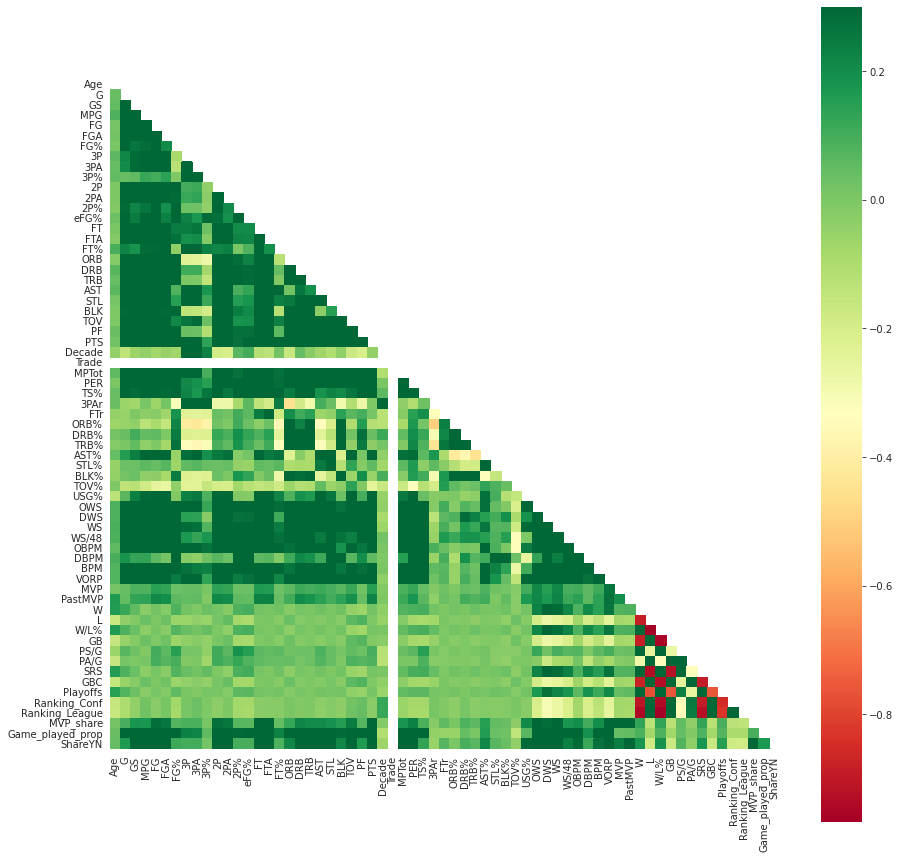

In [ ]:
#correlations of each features
corr_matrix = train.corr()

#plot heat map
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15, 15))
    ax = sns.heatmap(corr_matrix, mask=mask, vmax=.3, square=True,cmap="RdYlGn")

- W and L are highly correlated with several features -> drop W and L 
- GB and SRS are highly correlated -> drop GB 

Drop unhelpful columns

In [ ]:
unusefull_columns = [
    'Team',             #same with TM
    'GS',               #Game started, unuseful info, only partilly filled
    'FG',               #Sum of 2P and 3P, depend on 2P and 3P
    'FGA',              #Sum of 2PA and 3PA
    'FG%',              #Depending of 2P% and 3P%
    '2PA',              #Depending of 2P and 2P%
    '3PA',              #Depending of 3P and 3P%
    'FTA',              #Depending of FT and FT%
    'TRB',              #Sum of ORB and DRB
    'Decade',           #Unusefull
    'W',                #covered by W/L ratio
    'L',                #covered by W/L ratio
    'MPTot',            #covered by MP per Game, and MP total depends on number of game per season
    'GB'                #Highly correlated
]
train = train.drop(columns=unusefull_columns, axis = 1)
train.shape

(15763, 56)

In [ ]:
train["Trade"].value_counts()


False    15763
Name: Trade, dtype: int64

In [ ]:
# The trade column are all false, which means only players who haven't been traded could be elected to award
# Drop this column 
train = train.drop("Trade", axis = 1)
train.shape

(15763, 55)

In [ ]:
#The name of player and team is not useful on training 
train = train.drop("Player", axis = 1)
train = train.drop("Tm", axis =1)
train.shape

(15763, 53)

Check NA

In [ ]:
(train.isna().sum()/len(train)).sort_values(ascending=False).head(20)

3P%      0.153017
FT%      0.031149
2P%      0.005646
eFG%     0.003426
FTr      0.003426
3PAr     0.003426
TS%      0.002982
TOV%     0.002411
TRB%     0.000190
PER      0.000190
USG%     0.000190
BLK%     0.000190
STL%     0.000190
AST%     0.000190
DRB%     0.000190
ORB%     0.000190
WS/48    0.000190
WS       0.000000
DBPM     0.000000
OBPM     0.000000
dtype: float64

In [ ]:
train[train["3P%"].isna()].head()
# when 3P% is NaN 3P and 3PA is 0, fill NaN with 0

Pos  Age   G   MPG   3P  3P%   2P    2P%   eFG%   FT    FT%  ORB  DRB  AST  \
1   SF   23  32   6.1  0.0  NaN  0.8  0.500  0.500  0.4  0.867  0.3  0.6  0.4   
12  PF   30  49  14.4  0.0  NaN  1.7  0.458  0.458  0.7  0.500  1.2  2.5  1.0   
13  SF   22   9   5.9  0.0  NaN  1.3  0.400  0.400  0.3  0.600  0.7  0.9  0.2   
22  SG   24  16   8.9  0.0  NaN  0.4  0.280  0.280  0.2  0.500  0.4  0.6  0.8   
31  PF   28  82  33.0  0.0  NaN  6.6  0.512  0.512  4.0  0.667  2.6  6.8  1.7   

    STL  BLK  TOV   PF   PTS     Season   PER    TS%  3PAr    FTr  ORB%  DRB%  \
1   0.2  0.0  0.7  1.0   2.0  1979-1980   6.3  0.557   0.0  0.300   5.5   9.3   
12  0.4  0.5  1.2  2.6   4.0  1979-1980   8.7  0.474   0.0  0.380   8.9  19.5   
13  0.1  0.0  0.4  1.2   3.0  1979-1980   9.4  0.419   0.0  0.167  12.1  17.2   
22  0.1  0.0  0.5  0.7   1.1  1979-1980   2.1  0.308   0.0  0.240   4.5   8.0   
31  0.7  0.7  3.1  3.2  17.3  1979-1980  15.3  0.553   0.0  0.458   8.8  22.1   

    TRB%  AST%  STL%  BLK%  TOV%  USG%  OWS  DWS   WS  WS/48  OBPM  DBPM  BPM  \
1    7.6   7.9   1.2   0.3  28.0  16.2 -0.1  0.2  0.0  0.009  -4.4  -0.9 -5.2   
12  14.0   8.6   1.4   2.0  22.0  15.6 -0.5  0.8  0.3  0.018  -4.5   0.3 -4.2   
13  14.6   5.7   0.9   0.0  11.0  28.1 -0.1  0.0  0.0 -0.033  -4.5  -1.0 -5.5   
22   6.2  10.0   0.7   0.0  22.4  10.3 -0.2  0.0 -0.2 -0.064  -4.4  -0.9 -5.3   
31  15.6   7.5   1.0   1.2  16.4  22.4  2.1  3.9  6.0  0.106  -0.8  -0.9 -1.7   

    VORP    MVP  PastMVP   W/L%   PS/G   PA/G   SRS   GBC  Playoffs  \
1   -0.2  False    False  0.732  115.1  109.2  5.40   0.0      True   
12  -0.4  False    False  0.293  103.6  108.0 -4.20  36.0     False   
13  -0.1  False    False  0.293  103.6  108.0 -4.20  36.0     False   
22  -0.2  False    False  0.293  103.6  108.0 -4.20  36.0     False   
31   0.2  False    False  0.671  111.1  107.5  3.25   5.0      True   

    Ranking_Conf  Ranking_League  MVP_share  Game_played_prop  ShareYN  
1            1.0             2.0        0.0          0.390244    False  
12          11.0            21.0        0.0          0.597561    False  
13          11.0            21.0        0.0          0.109756    False  
22          11.0            21.0        0.0          0.195122    False  
31           3.0             5.0        0.0          1.000000    False

In [ ]:
# All the columns contain NAN are ratio, so fill all of them with 0
train.fillna(0, inplace = True)

In [ ]:
(train.isna().sum()/len(train)).sort_values(ascending=False).head(5)

Pos     0.0
AST%    0.0
BLK%    0.0
TOV%    0.0
USG%    0.0
dtype: float64

In [ ]:
# convert "Season" from str to int so we can easily indexing on "Season"
# rule: Season 2021 = 2020-2021 / Season 1980 = 1979 - 1980 
train["Season"] = train["Season"].apply(lambda x: int(x[-4:]))

In [ ]:
# Only use data after 2000
# train2 =  train[train["Season"]>= 2000]
train2 = train.copy()

Fisrt model - predict shareYN

Scale data 

In [ ]:
# create a list of categorical features
cate = list(train2.columns[(train2.dtypes == object) | (train2.dtypes == bool) ])

# create a list of numeric features ("Seanson" is NOT included since I will use it to split data and I don't want to scale it)
num  = list(train2.columns[~ ((train2.dtypes == object) | (train2.dtypes == bool) | (train2.columns == "Season") ) ])   

scale = pp.StandardScaler() 

def scaler(df):
  scaled = scale.fit_transform(df[num])
  df = df.drop(num,1)
  df[num] = scaled
  return df 

scaled = scaler(train2)

encoding

In [ ]:
encoder = pp.LabelEncoder()
def encode(data):
    '''function to encode non-null data and replace it in the original data'''
    #retains only non-null values
    nonulls = np.array(data.dropna())
    #reshapes the data for encoding
    impute_reshape = nonulls.reshape(-1,1)
    #encode date
    impute_ordinal = encoder.fit_transform(impute_reshape)
    #Assign back encoded values to non-null values
    data.loc[data.notnull()] = np.squeeze(impute_ordinal)
    return data

# Encoding categorical variables in predictor data set 
for i in cate:
    encode(scaled[i])

In [ ]:
# Split dataset into inputs (X) and targets (y)
predict_columns = ["MVP", "MVP_share", "ShareYN"]
X = scaled.drop(columns = predict_columns, axis = 1)
y = scaled[["ShareYN","Season"]]

In [ ]:
# Split train & test data
# training set containing data from 2020 - 2017 / test set containing data from 2018 - 2021 

X_train = X[~(X["Season"] >= 2018)]
y_train = y[~(y["Season"] >= 2018)]

X_test = X[(X["Season"] >= 2018)]
y_test = y[(y["Season"] >= 2018)]

# drop "Season" which is no longer being useful 
X_train.drop("Season",1,inplace = True)
y_train.drop("Season",1,inplace = True)
X_test.drop("Season",1,inplace = True)
y_test.drop("Season",1,inplace = True)
X.drop("Season",1,inplace = True)
y.drop("Season",1,inplace = True)

# convert all elements into float for machine learning models 
X_train = X_train.apply(lambda x: x.astype("float64"))
y_train = y_train.apply(lambda x: x.astype("float64"))
X_test = X_test.apply(lambda x: x.astype("float64"))
y_test = y_test.apply(lambda x: x.astype("float64"))
X = X.apply(lambda x: x.astype("float64"))
y = y.apply(lambda x: x.astype("float64"))

In [ ]:
# Check dimension
print("X_train:", X_train.shape, "\n","y_train:", y_train.shape, "\n", "X_test:",  X_test.shape, "\n",  "y_test:", y_test.shape)

X_train: (13908, 49) 
 y_train: (13908, 1) 
 X_test: (1855, 49) 
 y_test: (1855, 1)


In [ ]:
### Handling Imbalanced Data (SMOTE)
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 42)
X_train, y_train = sm.fit_resample(X_train, y_train)

sm = SMOTE(random_state = 42)
X, y = sm.fit_resample(X, y)

In [ ]:
# Check dimension
print("X_train:", X_train.shape, "\n","y_train:", y_train.shape)

X_train: (26558, 49) 
 y_train: (26558, 1)


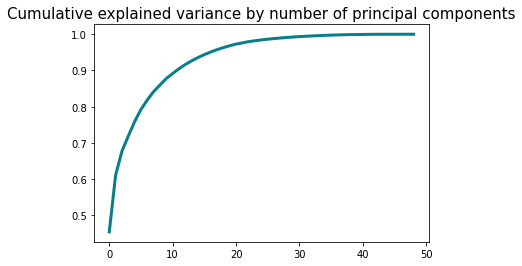

In [ ]:
# Feature Reduction PCA
from sklearn.decomposition import PCA

pca = PCA().fit(X_train)

plt.plot(pca.explained_variance_ratio_.cumsum(), lw=3, color='#087E8B')
plt.title('Cumulative explained variance by number of principal components', size=15)
plt.show()

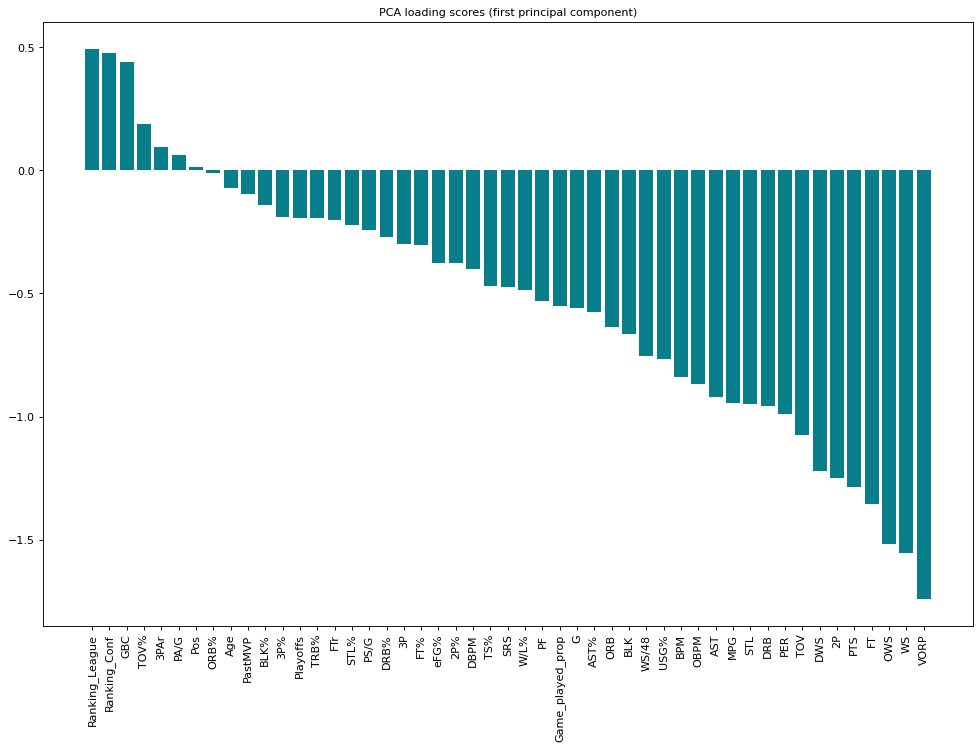

In [ ]:
loadings = pd.DataFrame(
    data=pca.components_.T * np.sqrt(pca.explained_variance_), 
    columns=[f'PC{i}' for i in range(1, len(X_train.columns) + 1)],
    index=X_train.columns
)

pc1_loadings = loadings.sort_values(by='PC1', ascending=False)[['PC1']]
pc1_loadings = pc1_loadings.reset_index()
pc1_loadings.columns = ['Attribute', 'CorrelationWithPC1']

plt.figure(figsize=(15, 10), dpi=80)

plt.bar(x=pc1_loadings['Attribute'], height=pc1_loadings['CorrelationWithPC1'], color='#087E8B')
plt.title('PCA loading scores (first principal component)', size=10)
plt.xticks(rotation='vertical')
plt.show()

#https://medium.com/towards-data-science/3-essential-ways-to-calculate-feature-importance-in-python-2f9149592155 references 

In [ ]:
pca = PCA(0.95)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
X_pca    = pca.transform(X)

### Clustering

In [ ]:
temp = train.copy()
preproc = ColumnTransformer(transformers=[('num', pp.StandardScaler(), num), ('cat', pp.OneHotEncoder(handle_unknown = 'ignore'), cate)])
preproc.fit(temp)
cl = preproc.transform(temp)
cl.shape

(15763, 60)

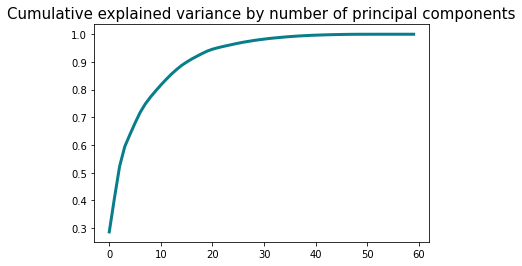

In [ ]:
pca2 = PCA().fit(cl)
plt.plot(pca2.explained_variance_ratio_.cumsum(), lw=3, color='#087E8B')
plt.title('Cumulative explained variance by number of principal components', size=15)
plt.show()

In [ ]:
model = PCA(n_components=15).fit(cl)
cl_pca = model.transform(cl)
cl_pca.shape

(15763, 15)

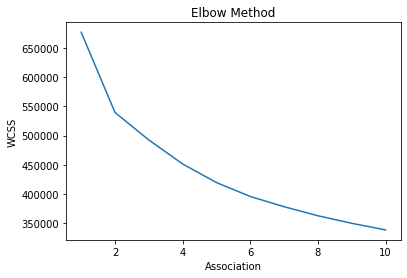

In [ ]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',
                    max_iter = 400, n_init = 10, random_state = 0)
    kmeans.fit(cl_pca)
    wcss.append(kmeans.inertia_)
  
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Association')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3, random_state = 18)
model = kmeans.fit(cl_pca)
clusters = model.predict(cl_pca)
train["Cluster"] = clusters
train["Cluster"].value_counts()

1    5725
2    5438
0    4600
Name: Cluster, dtype: int64

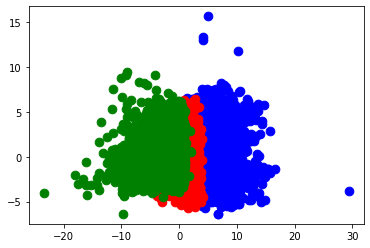

In [ ]:
plt.scatter(cl_pca[clusters ==0, 0], cl_pca[clusters ==0, 1], s = 75, c= 'blue')
plt.scatter(cl_pca[clusters ==1, 0], cl_pca[clusters ==1, 1], s = 75, c= 'red')
plt.scatter(cl_pca[clusters ==2, 0], cl_pca[clusters ==2, 1], s = 75, c= 'green')

In [ ]:
g = train.groupby('Cluster').mean()
c = train['Cluster'].value_counts()

features = ["ORB","DRB","AST","STL","BLK","3P","OWS","DWS","PTS","MVP"]
r = g[features]
r['counts'] =c
r


ORB       DRB       AST       STL       BLK        3P       OWS  \
Cluster                                                                         
0        1.672283  4.280565  3.399674  1.101804  0.728717  0.679109  3.850261   
1        1.047965  2.554253  1.900262  0.696472  0.410533  0.501362  0.848803   
2        0.585473  1.303825  0.812817  0.338286  0.219217  0.204689  0.148363   

              DWS        PTS      MVP  counts  
Cluster                                        
0        2.770957  15.263391  0.00913    4600  
1        0.988699   8.325939  0.00000    5725  
2        0.551710   3.469842  0.00000    5438

## Modeling <a class="anchor" id="modeling"></a>

Two Steps Prediction 
- Classification Predict: MVP eligibility (Predict ShareYN)
- Regression: Predict MVP from the eligibel candidatess (Predict MVP_share) 

## Predicting MVP eligibility <a class="anchor" id="eligibility"></a>

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score,roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score


GridSearchCV for Logistic Regression 

In [ ]:
# Use grid search to find the optimal combination of hyperparameters in Logistic Regression
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]} # l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X,y)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1000.0, 'penalty': 'l2'}
accuracy : 0.9539917479112615


In [ ]:
# Logistic Regression 
lr_best = LogisticRegression(penalty = 'l2', C = 1000) #penalty = 'l2', C = 1000

# fit the model with data
lr_best.fit(X_train_pca,y_train)
y_pred=lr_best.predict(X_test_pca)

# Evaluation 
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred)*100,2),"%")
print("Precision:",round(metrics.precision_score(y_test, y_pred)*100,2),"%")
print("Recall:",round(metrics.recall_score(y_test, y_pred)*100,2),"%")
print("F1 Score:", round(f1_score(y_test,y_pred)*100,2),"%")

Accuracy: 95.42 %
Precision: 37.04 %
Recall: 100.0 %
F1 Score: 54.05 %


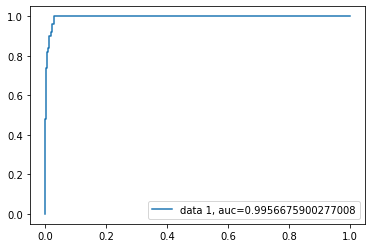

In [ ]:
y_pred_proba = lr_best.predict_proba(X_test_pca)[::,1]

fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

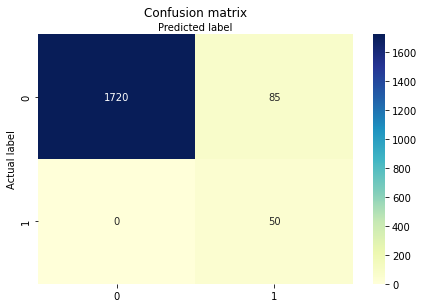

In [ ]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
# 10 folds cross validation 

kfold = KFold(n_splits=10, random_state=2022, shuffle=True)

lr_cv = LogisticRegression(penalty = 'l2', C = 1000)

results = cross_val_score(lr_cv, X_pca, y, cv=kfold)

# Output the accuracy. Calculate the mean and std across all folds. 
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 94.879% (0.306%)


###SVM

In [ ]:
from sklearn import svm

In [ ]:
clf_svm = svm.SVC()
clf_svm.fit(X_train_pca,y_train)
y_pred_svm = clf_svm.predict(X_test_pca)

print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_svm)*100,2),"%")
print("Precision:",round(metrics.precision_score(y_test, y_pred_svm)*100,2),"%")
print("Recall:",round(metrics.recall_score(y_test, y_pred_svm)*100,2),"%")
print("F1 Score:", round(f1_score(y_test,y_pred_svm)*100,2),"%")

Accuracy: 97.25 %
Precision: 49.47 %
Recall: 94.0 %
F1 Score: 64.83 %


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

In [ ]:
clf_rf = RandomForestClassifier(n_estimators=100)
clf_rf.fit(X_train_pca, y_train)
y_pred_random_forest = clf_rf.predict(X_test_pca)
acc_random_forest = round(clf_rf.score(X_test_pca, y_test) * 100, 2)

print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_random_forest)*100,2),"%")
print("Precision:",round(metrics.precision_score(y_test, y_pred_random_forest)*100,2),"%")
print("Recall:",round(metrics.recall_score(y_test, y_pred_random_forest)*100,2),"%")
print("F1 Score:", round(f1_score(y_test,y_pred_random_forest)*100,2),"%")

Accuracy: 98.33 %
Precision: 63.77 %
Recall: 88.0 %
F1 Score: 73.95 %


##Predicting MVP Candidates <a class="anchor" id="eligibility_Predict"></a>

In [ ]:
test = s22.copy()

In [ ]:
player = s22[["Player"]]

In [ ]:
unusefull_columns = [
    'Team',             #same with TM
    'GS',               #Game started, unuseful info, only partilly filled
    'FG',               #Sum of 2P and 3P, depend on 2P and 3P
    'FGA',              #Sum of 2PA and 3PA
    'FG%',              #Depending of 2P% and 3P%
    '2PA',              #Depending of 2P and 2P%
    '3PA',              #Depending of 3P and 3P%
    'FTA',              #Depending of FT and FT%
    'TRB',              #Sum of ORB and DRB
    'Decade',           #Unuseful
    'W',                #covered by W/L ratio
    'L',                #covered by W/L ratio
    'MPTot',            #covered by MP per Game, and MP total depends on number of game per season
    'GB',               #Highly correlated
    'Trade',            #The trade column are all false, which means only players who haven't been traded could be elected to award
    'Player',           #The name of player is not useful 
    'Tm',               #The name of team is not useful 
    'Season'            #Unuseful
]
test = test.drop(columns=unusefull_columns, axis = 1)

In [ ]:
# Filling missing values 
test.fillna(0, inplace = True)
(test.isna().sum()/len(test)).sort_values(ascending=False).head(5)

Pos     0.0
DRB%    0.0
AST%    0.0
STL%    0.0
BLK%    0.0
dtype: float64

In [ ]:
# create a list of categorical features
cate = list(test.columns[(test.dtypes == object) | (test.dtypes == bool) ])

# create a list of numeric features ("Seanson" is NOT included since I will use it to split data and I don't want to scale it)
num  = list(test.columns[~ ((test.dtypes == object) | (test.dtypes == bool) ) ])   

# scale numeric variables 
scaled2 = scaler(test)

# Encoding categorical variables 
for i in cate:
    encode(scaled2[i])

# PCA dimension reduction
reduced = pca.transform(scaled2)

In [ ]:
# predict mvp candidates in the recent season 2021-2022 
y_pred = lr_best.predict(reduced)

# get the player names 
results_22 = player.assign(Prediction = y_pred)

# get confidence score for prediction e.g. the higher the confidence score is, the more likely this player will be predicted as a MVP candidates
results_22['confidence_score'] = lr_best.decision_function(reduced)

# get all the predicted MVP candidates 
candidates = list(results_22[results_22["Prediction"] == 1]["Player"].values)

# display the predicted MVP candidates in descending confidence score 
results_22.sort_values('confidence_score', ascending = False, ignore_index = True).head(15)

Player  Prediction  confidence_score
0   Giannis Antetokounmpo         1.0         12.064325
1            Nikola Jokić         1.0         11.829144
2             Joel Embiid         1.0         10.229131
3             Luka Dončić         1.0          8.524647
4               Ja Morant         1.0          7.366794
5            LeBron James         1.0          6.922947
6           Stephen Curry         1.0          6.875250
7              Chris Paul         1.0          6.748942
8           DeMar DeRozan         1.0          6.588772
9            Jimmy Butler         1.0          6.410305
10             Trae Young         1.0          6.330801
11     Karl-Anthony Towns         1.0          6.252892
12           Kevin Durant         1.0          6.194515
13           Jayson Tatum         1.0          5.872098
14           Devin Booker         1.0          5.516034

In [ ]:
results_22[results_22["Prediction"] == 1.0].sort_values('confidence_score', ascending = False, ignore_index = True).shape

(58, 3)

In [ ]:
print("number of candidates in average:", master[master["ShareYN"] == True].shape[0] / 41)

number of candidates in average: 16.5609756097561


In [ ]:
results_22[results_22["Prediction"] == 1.0].sort_values('confidence_score', ascending = False, ignore_index = True)["Player"]

0       Giannis Antetokounmpo
1                Nikola Jokić
2                 Joel Embiid
3                 Luka Dončić
4                   Ja Morant
5                LeBron James
6               Stephen Curry
7                  Chris Paul
8               DeMar DeRozan
9                Jimmy Butler
10                 Trae Young
11         Karl-Anthony Towns
12               Kevin Durant
13               Jayson Tatum
14               Devin Booker
15           Donovan Mitchell
16                Bam Adebayo
17                Rudy Gobert
18               Jrue Holiday
19              Pascal Siakam
20            Dejounte Murray
21            Khris Middleton
22             Darius Garland
23             Nikola Vučević
24              Anthony Davis
25                Zach LaVine
26              Fred VanVleet
27                 Kyle Lowry
28                Paul George
29              Julius Randle
30              Deandre Ayton
31               Jaylen Brown
32                LaMelo Ball
33        

## Forecasting 2022 MVP (Predicting MVP Share) <a class="anchor" id="eligibility_Predict"></a>

Split train & test data

In [ ]:
data_copy =  pd.read_csv(dataPath + "/global.csv")
players = data_copy["Player"]
scaled["Player"] = players 

In [ ]:
from tqdm import tqdm
from sklearn.metrics import mean_absolute_error

In [ ]:
df_candidate = scaled[scaled.ShareYN == 1].drop(columns=['MVP', 'ShareYN']).reset_index()
df_candidate.drop("index",1,inplace= True)

In [ ]:
# Split dataset into inputs (X) and targets (y)
X = df_candidate.drop(["MVP_share","Player"], axis = 1)
y = df_candidate[["MVP_share","Season"]]

In [ ]:
# Split train & test data
# training set containing data from 2020 - 2017 / test set containing data from 2018 - 2021 

X_train = X[~(X["Season"] >= 2018)]
y_train = y[~(y["Season"] >= 2018)]
X_test = X[(X["Season"] >= 2018)]
y_test = y[(y["Season"] >= 2018)]

# drop "Season" which is no longer being useful 
X_train.drop("Season",1,inplace = True)
y_train.drop("Season",1,inplace = True)
X_test.drop("Season",1,inplace = True)
y_test.drop("Season",1,inplace = True)
X.drop("Season",1,inplace = True)
y.drop("Season",1,inplace = True)

# convert all elements into float for machine learning models 
X_train = X_train.apply(lambda x: x.astype("float64"))
y_train = y_train.apply(lambda x: x.astype("float64"))
X_test = X_test.apply(lambda x: x.astype("float64"))
y_test = y_test.apply(lambda x: x.astype("float64"))
X = X.apply(lambda x: x.astype("float64"))
y = y.apply(lambda x: x.astype("float64"))

In [ ]:
pca = PCA(0.95)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca  = pca.transform(X_test)
X_pca       = pca.transform(X)

## Models for predicting MVP share <a class="anchor" id="MVP"></a>

In [ ]:
# The evaluation metrics would be Root Mean Squared Error and R-squared 
def evaluate(real,pred):
    mse = metrics.mean_squared_error(real,pred)
    rmse = np.sqrt(mse)
    print("Root Mean Squared Error:", rmse, '\n', "R_squared:", metrics.r2_score(real,pred))

Linear Regression 

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train_pca, y_train)
y_pred_lr = lr.predict(X_test_pca)

In [ ]:
evaluate(y_test,y_pred_lr)

Root Mean Squared Error: 3.2111788286763012 
 R_squared: 0.5473208659393916


Random Forest

In [ ]:
clf = RandomForestRegressor(random_state=2022)
clf.fit(X_train_pca, y_train)
y_pred_random_forest = clf.predict(X_test_pca)
evaluate(y_test,y_pred_random_forest)

Root Mean Squared Error: 2.6133435663146285 
 R_squared: 0.7001842042921298


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train_pca,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [ ]:
rf_random.best_params_

{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 5,
 'n_estimators': 200}

In [ ]:
# Best 
rf_best = RandomForestRegressor(bootstrap = True, max_depth = 10, max_features = 'auto',
                            min_samples_leaf = 4, min_samples_split = 5, n_estimators = 200, random_state=2022)
rf_best.fit(X_train_pca, y_train)
y_pred_random_forest = rf_best.predict(X_test_pca)
evaluate(y_test,y_pred_random_forest)

Root Mean Squared Error: 2.5463424548136784 
 R_squared: 0.7153605347570327


### KNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

reg_kNN = KNeighborsRegressor()

param_kNN = {
                'n_neighbors' : np.array([5, 10, 15, 20, 25]),
            }

reg_kNN_CV = GridSearchCV(reg_kNN, param_kNN, cv = 5 )

reg_kNN_CV.fit(X_train_pca, y_train)

reg_kNN_CV.best_estimator_

KNeighborsRegressor(n_neighbors=10)

In [ ]:
knn_best = reg_kNN_CV.best_estimator_
knn_best.fit(X_train_pca, y_train)

y_pred_knn = knn_best.predict(X_test_pca)
evaluate(y_test,y_pred_knn)

Root Mean Squared Error: 3.3504665336858457 
 R_squared: 0.5071984542493211


### XGBooster

In [ ]:
from xgboost import XGBRegressor
gb = XGBRegressor(random_state =2022)
gb.fit(X_train_pca, y_train)
y_pred_gb = gb.predict(X_test_pca)
evaluate(y_test,y_pred_gb)

[21:45:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Root Mean Squared Error: 2.547536768280885 
 R_squared: 0.7150934626911837


In [ ]:
xgb1 = XGBRegressor()
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 2,
                        n_jobs = 5,
                        verbose=True)

xgb_grid.fit(X_train_pca, y_train)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
0.5643259845524768
{'colsample_bytree': 0.7, 'learning_rate': 0.03, 'max_depth': 5, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}


In [ ]:
xgb_best = xgb_grid.best_estimator_
xgb_best.fit(X_train_pca, y_train)
y_pred_gb = xgb_best.predict(X_test_pca)
evaluate(y_test,y_pred_gb)

Root Mean Squared Error: 2.4635326776395634 
 R_squared: 0.7335730534409286


### Get Prediction Accuracy by LOOCV

### Leave One Out Cross Validation 

In [ ]:
to_drop = ["Player"]

def train_test_split_by_year(year, df, scaling=False):
    #test year = selected year, train year = other years outside of selected year 
    train_df = df[df['Season'] != year]
    test_df = df[df['Season'] == year]
    
    train_df2 = train_df.copy()
    test_df2 = test_df.copy()
    
    train_df2.drop(to_drop, axis=1, inplace=True)
    test_df2.drop(to_drop, axis=1, inplace=True)
    
    if scaling == True:
        sc_X = StandardScaler()
        sc_y = StandardScaler()
        train_df2 = sc_X.fit_transform(train_df2)
        test_df2 = sc_y.fit_transform(test_df2)
    
    X_train = train_df2.copy()
    y_train = X_train["MVP_share"]
    
    X_test = test_df2.copy()
    y_test = X_test["MVP_share"]

    X_train.drop('MVP_share', axis=1, inplace=True)
    cols = X_train.columns
    X_test.drop('MVP_share', axis=1, inplace=True)

    X_train = np.array(X_train)
    y_train = np.array(y_train)
    X_test = np.array(X_test)
    y_test = np.array(y_test)
    
    return X_train, y_train, X_test, y_test, cols

In [ ]:
  def run_model(regressor, X_train, y_train, X_test, y_test, df, year):

    #pca = PCA(0.99)
    #pca.fit(X_train)
    #X_train = pca.transform(X_train)
    #X_test  = pca.transform(X_test)

    model = regressor
    model.fit(X_train, y_train) 
    predictions = model.predict(X_test)
    mae = mean_absolute_error(predictions, y_test)
    r2 = r2_score(y_test, predictions)
    
    mvp_race = df[df['Season'] == year]
    mvp_race['predicted_share'] = predictions
    mvp_race = mvp_race.sort_values(["MVP_share", "predicted_share"], ascending = (False, False))
                                    
    actual_winner = mvp_race[mvp_race['MVP_share'] == mvp_race['MVP_share'].max()]['Player']
    predicted_winner = mvp_race[mvp_race['predicted_share'] == mvp_race['predicted_share'].max()]['Player']
    return model, mae, r2, predicted_winner.iloc[0], actual_winner.iloc[0], mvp_race

In [ ]:
years = [year for year in range(1980, 2022)]

def run_model_average(df, regressor, print_metrics=False):
    mae_lst = []
    r2_lst = []
    predicted_lst = []
    actual_lst = []
    label_lst =[]
    model_lst = []
    for year in tqdm(years):
        X_train, y_train, X_test, y_test, cols = train_test_split_by_year(year=year, df=df)
        model, mae, r2, predicted_winner, actual_winner, mvp_race = run_model(regressor,
                                                              X_train,
                                                              y_train,
                                                              X_test,
                                                              y_test,
                                                              df=df,
                                                              year=year
                                                            )
        if predicted_winner == actual_winner:
            label = 'correct'
        else:
            label = 'incorrect'
        mae_lst.append(mae)
        r2_lst.append(r2)
        predicted_lst.append(predicted_winner)
        actual_lst.append(actual_winner)
        label_lst.append(label)
        model_lst.append(model)
    d = {
    'year': years,
    'MAE': mae_lst,
    'R squared': r2_lst,
    'Predicted MVP': predicted_lst,
    'Actual MVP': actual_lst,
    'Label': label_lst
    }

    summary = pd.DataFrame(d)
    correct_count = summary['Label'].value_counts().iloc[0]
    incorrect_count = summary['Label'].value_counts().iloc[1]
    accuracy = correct_count / (correct_count + incorrect_count)
    avg_mae = summary['MAE'].mean()
    avg_r2  = summary['R squared'].mean()
    
    if print_metrics == True:
        print(f"Average MAE: {avg_mae}")
        print(f"Average R squared: {avg_r2}")
        print(f"Prediction accuracy: {accuracy}")
    return avg_mae, avg_r2, accuracy, summary, model_lst, cols

In [ ]:
lr_avg_mae, lr_avg_r2, lr_accuracy, lr_summary, lr_models, cols = run_model_average(df=df_candidate,
                  regressor = lr,
                  #scaling=True,
                 print_metrics=True)

100%|██████████| 42/42 [00:01<00:00, 26.83it/s]

Average MAE: 2.193944764833127
Average R squared: 0.5455488437921744
Prediction accuracy: 0.6666666666666666


In [ ]:
rf_avg_mae, rf_avg_r2, rf_accuracy, rf_summary, rf_models, rf_cols = run_model_average(df=df_candidate,
                  regressor=RandomForestRegressor(bootstrap = True, max_depth = 100, max_features = 'auto', min_samples_leaf = 4,
                                                  min_samples_split = 5, n_estimators =  1000, random_state = 2022),
                print_metrics=True)

100%|██████████| 42/42 [08:23<00:00, 11.98s/it]

Average MAE: 1.6715026928882832
Average R squared: 0.622679428472982
Prediction accuracy: 0.6904761904761905


In [ ]:
rf_summary[["year","Predicted MVP","Actual MVP","Label"]].set_index("year")

Predicted MVP             Actual MVP      Label
year                                                     
1980         Larry Bird    Kareem Abdul-Jabbar  incorrect
1981      Julius Erving          Julius Erving    correct
1982      Magic Johnson           Moses Malone  incorrect
1983         Larry Bird           Moses Malone  incorrect
1984         Larry Bird             Larry Bird    correct
1985         Larry Bird             Larry Bird    correct
1986         Larry Bird             Larry Bird    correct
1987     Michael Jordan          Magic Johnson  incorrect
1988     Michael Jordan         Michael Jordan    correct
1989     Michael Jordan          Magic Johnson  incorrect
1990     Michael Jordan          Magic Johnson  incorrect
1991     Michael Jordan         Michael Jordan    correct
1992     Michael Jordan         Michael Jordan    correct
1993     Michael Jordan        Charles Barkley  incorrect
1994    Hakeem Olajuwon        Hakeem Olajuwon    correct
1995     David Robinson         David Robinson    correct
1996     Michael Jordan         Michael Jordan    correct
1997     Michael Jordan            Karl Malone  incorrect
1998     Michael Jordan         Michael Jordan    correct
1999   Shaquille O'Neal            Karl Malone  incorrect
2000   Shaquille O'Neal       Shaquille O'Neal    correct
2001   Shaquille O'Neal          Allen Iverson  incorrect
2002         Tim Duncan             Tim Duncan    correct
2003         Tim Duncan             Tim Duncan    correct
2004         Tim Duncan          Kevin Garnett  incorrect
2005      Kevin Garnett             Steve Nash  incorrect
2006       LeBron James             Steve Nash  incorrect
2007        Kobe Bryant          Dirk Nowitzki  incorrect
2008         Chris Paul            Kobe Bryant  incorrect
2009       LeBron James           LeBron James    correct
2010       LeBron James           LeBron James    correct
2011       LeBron James           Derrick Rose  incorrect
2012       LeBron James           LeBron James    correct
2013       Kevin Durant           LeBron James  incorrect
2014       Kevin Durant           Kevin Durant    correct
2015       James Harden          Stephen Curry  incorrect
2016       LeBron James          Stephen Curry  incorrect
2017  Russell Westbrook      Russell Westbrook    correct
2018       James Harden           James Harden    correct
2019       James Harden  Giannis Antetokounmpo  incorrect
2020       James Harden  Giannis Antetokounmpo  incorrect
2021       Nikola Jokić           Nikola Jokić    correct

In [ ]:
rf_avg_mae, rf_avg_r2, rf_accuracy, rf_summary, rf_models, rf_cols = run_model_average(df=df_candidate,
                  regressor=rf_best,
                print_metrics=True)

100%|██████████| 42/42 [01:33<00:00,  2.22s/it]

Average MAE: 1.6836810695021451
Average R squared: 0.6194808127150092
Prediction accuracy: 0.6904761904761905


In [ ]:
from xgboost import XGBRegressor
xgb_avg_mae, xgb_avg_r2, xgb_accuracy, xgb_summary, xgb_models, xgb_cols = run_model_average(df=df_candidate,
                  regressor = xgb_best , print_metrics=True)

100%|██████████| 42/42 [00:55<00:00,  1.33s/it]

Average MAE: 1.5939746620745443
Average R squared: 0.6469721864974994
Prediction accuracy: 0.6666666666666666


In [ ]:
## KNN
rf_avg_mae, rf_avg_r2, rf_accuracy, rf_summary, rf_models, rf_cols = run_model_average(df=df_candidate,
                  regressor=knn_best,
                print_metrics=True)

100%|██████████| 42/42 [00:00<00:00, 47.79it/s]

Average MAE: 2.1088438008465706
Average R squared: 0.4499502094937031
Prediction accuracy: 0.5


# Predicting MVP in the current season 2021-2022 <a class="anchor" id="MVP_Predict"></a>

In [ ]:
test = s22.copy()

In [ ]:
# Filling missing values 
test.fillna(0, inplace = True)
(test.isna().sum()/len(test)).sort_values(ascending=False).head(5)

# Drop unuseful columns 
test = test.drop(columns=unusefull_columns, axis = 1)

In [ ]:
# create a list of categorical features
cate = list(test.columns[(test.dtypes == object) | (test.dtypes == bool) ])

# create a list of numeric features ("Seanson" is NOT included since I will use it to split data and I don't want to scale it)
num  = list(test.columns[~ ((test.dtypes == object) | (test.dtypes == bool) ) ])   

# scale numeric variables 
scaled2 = scaler(test)

# Encoding categorical variables 
for i in cate:
    encode(scaled2[i])

# PCA dimension reduction
reduced = pca.transform(scaled2)

In [ ]:
reduced.shape

(510, 14)

## Random Forest Prediction

In [ ]:
# predict mvp candidates in the recent season 2021-2022 
y_pred = rf_best.predict(reduced)

# get the player names 
results_22 = player.assign(Prediction = y_pred)

# get confidence score for prediction e.g. the higher the confidence score is, the more likely this player will be predicted as a MVP candidates
#results_22['confidence_score'] = lr_best.decision_function(reduced)

# get all the predicted MVP candidates 
candidates = list(results_22[results_22["Prediction"] == 1]["Player"].values)

# display the predicted MVP candidates in descending confidence score 
#results_22.sort_values('confidence_score', ascending = False, ignore_index = True).head(15)

In [ ]:
results_22.sort_values("Prediction",ascending = False).head()

Player  Prediction
309           Nikola Jokić   13.085095
75   Giannis Antetokounmpo   12.817300
317            Joel Embiid    8.841221
484            Luka Dončić    4.602219
34               Ja Morant    3.891855

## KNN

In [ ]:
y_pred = knn_best.predict(reduced)
results_22 = player.assign(Prediction = y_pred)
candidates = list(results_22[results_22["Prediction"] == 1]["Player"].values)

In [ ]:
results_22.sort_values("Prediction",ascending = False).head()

Player  Prediction
309           Nikola Jokić    9.346072
75   Giannis Antetokounmpo    8.929789
317            Joel Embiid    4.473491
222            Rudy Gobert    3.837105
396     Karl-Anthony Towns    2.425572

## XGBoost

In [ ]:
y_pred = xgb_best.predict(reduced)
results_22 = player.assign(Prediction = y_pred)
candidates = list(results_22[results_22["Prediction"] == 1]["Player"].values)

In [ ]:
results_22.sort_values("Prediction",ascending = False).head()

Player  Prediction
75   Giannis Antetokounmpo   12.060459
309           Nikola Jokić   11.398022
317            Joel Embiid    7.923958
34               Ja Morant    5.272460
484            Luka Dončić    4.146081

In [ ]:
y_pred = lr.predict(reduced)
results_22 = player.assign(Prediction = y_pred)
candidates = list(results_22[results_22["Prediction"] == 1]["Player"].values)

In [ ]:
results_22.sort_values("Prediction",ascending = False).head()

Player  Prediction
309           Nikola Jokić    9.928906
75   Giannis Antetokounmpo    8.761899
317            Joel Embiid    6.278138
484            Luka Dončić    6.038182
435          Stephen Curry    5.061064